In [2]:
!pip3 install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.4 MB/s eta 0:00:00


In [4]:
!pip3 install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 10.8 MB/s eta 0:00:00


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk.stem as stemmer
np.random.seed(2018)
import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

In [7]:
SG_Dataset = pd.read_excel('EnvNP_SG_Facebook.xlsx')
SG_Dataset

,Unnamed: 0,Name of organisation,Description of organisation,Mission/ Objectives/ Purpose,Programmes/ projects,Funding sources,Collaboration with government / businesses,Choice of Climate action,No. of employees,Geographical focus,...,PostIDs,Comments,Content,Post_URL,Images,Date,Reactions,Reaction_Count,Shares,video
0,0,Nature Society Singapore (NSS),The Nature Society (Singapore) or NSS is a non...,- Organise nature appreciation activities like...,"- guided nature walks, bird and butterfly watc...","Run by volunteers, the Society depends financi...",Yes - businesses,Advocacy/ Mitigation,43,"Singapore, Singapore",...,pfbid09WCGd7tYeo7P7Xc5p9YGWoNwsMvhMWLwnPouPnPt...,7.0,"Dr Chan Kin Onn, the former curator of herpeto...",https://www.facebook.com/naturesocietysingapor...,['https://external-xsp1-1.xx.fbcdn.net/emg1/v/...,2024-03-26T14:48:21.688783,"{'likes': 7, 'loves': 1, 'wow': 0, 'cares': 0,...",8.0,0.0,[]
1,0,Nature Society Singapore (NSS),The Nature Society (Singapore) or NSS is a non...,- Organise nature appreciation activities like...,"- guided nature walks, bird and butterfly watc...","Run by volunteers, the Society depends financi...",Yes - businesses,Advocacy/ Mitigation,43,"Singapore, Singapore",...,pfbid02v7vjGso56ie5bQGdvdbJVMM5Pc18bRFPzMxLYXv...,4.0,wildlife photography tips from Jayaprakash Boj...,https://www.facebook.com/naturesocietysingapor...,['https://external-xsp1-1.xx.fbcdn.net/emg1/v/...,2024-03-26T12:48:27.974982,"{'likes': 15, 'loves': 0, 'wow': 0, 'cares': 0...",15.0,0.0,[]
2,0,Nature Society Singapore (NSS),The Nature Society (Singapore) or NSS is a non...,- Organise nature appreciation activities like...,"- guided nature walks, bird and butterfly watc...","Run by volunteers, the Society depends financi...",Yes - businesses,Advocacy/ Mitigation,43,"Singapore, Singapore",...,pfbid02FwUTacg4PSXTG7LiZ3HSEmCKFjt6ddFRV4q3v8p...,0.0,flashback:a talk on the predecessor of Nature ...,https://www.facebook.com/naturesocietysingapor...,['https://external-xsp1-1.xx.fbcdn.net/emg1/v/...,2024-03-25T12:48:28.006620,"{'likes': 7, 'loves': 0, 'wow': 0, 'cares': 0,...",7.0,0.0,[]
3,0,Nature Society Singapore (NSS),The Nature Society (Singapore) or NSS is a non...,- Organise nature appreciation activities like...,"- guided nature walks, bird and butterfly watc...","Run by volunteers, the Society depends financi...",Yes - businesses,Advocacy/ Mitigation,43,"Singapore, Singapore",...,pfbid02A81piNYTixYdt6AU4qoExPiubqUixQPwPycX7GQ...,4.0,more on the Woodlands Checkpoint expansion …,https://www.facebook.com/naturesocietysingapor...,['https://external-xsp1-1.xx.fbcdn.net/emg1/v/...,2024-03-23T12:48:28.062741,"{'likes': 2, 'loves': 0, 'wow': 0, 'cares': 0,...",3.0,0.0,[]
4,0,Nature Society Singapore (NSS),The Nature Society (Singapore) or NSS is a non...,- Organise nature appreciation activities like...,"- guided nature walks, bird and butterfly watc...","Run by volunteers, the Society depends financi...",Yes - businesses,Advocacy/ Mitigation,43,"Singapore, Singapore",...,pfbid0AdHRLg587zELE4RTszkNyFokKXu93bf8fSTicitJ...,3.0,a good perspective of a whole body of a fungi ...,https://www.facebook.com/naturesocietysingapor...,['https://scontent-xsp1-2.xx.fbcdn.net/v/t39.3...,2024-03-23T12:48:28.113328,"{'likes': 19, 'loves': 0, 'wow': 1, 'cares': 0...",20.0,3.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,41,Earthlink NTU,"Since 1993, Earthlink has led NTU’s environmen...",Raise awareness of environmental issues,- Guided tours\n- NTU Biodiversity Week\n- NTr...,NaN,Yes - businesses,Mitigation/ Advocacy,NaN,Singapore,...,pfbid0324p6AuFLtRDzwKLa4GuQw7adWvS65kctLdKz9GC...,3.0,Earthlink NTU’s Welcome Tea 2018 will be happe...,https://www.facebook.com/earthlinkntu/posts/pf...,['https://scontent-xsp2-1.xx.fbcdn.net/v/t1.64...,2018-08-15T00:00:00,"{'likes': 4, 'loves': 0, 'wow': 0, 'cares': 0,...",4.0,0.0,[]
1802,41,Earthlink NTU,"Since 1993, Earthlink has led NTU’s environmen...",Rais

In [9]:
SG_Dataset.dropna(subset=['Content'], inplace=True)

In [31]:
df = SG_Dataset[['Facebook_User','Content']]
df.head(10)

,Facebook_User,Content
0,naturesocietysingapore,"Dr Chan Kin Onn, the former curator of herpeto..."
1,naturesocietysingapore,wildlife photography tips from Jayaprakash Boj...
2,naturesocietysingapore,flashback:a talk on the predecessor of Nature ...
3,naturesocietysingapore,more on the Woodlands Checkpoint expansion …
4,naturesocietysingapore,a good perspective of a whole body of a fungi ...
5,naturesocietysingapore,it's the International Day of Forests ..painti...
6,naturesocietysingapore,Call for Volunteers!!!Have an interest in natu...
7,naturesocietysingapore,it's World Frog Day ...
8,naturesocietysingapore,All of these will provide insights into how th...
9,naturesocietysingapore,an aerial perspective of the planned reclamati...


In [ ]:
#TOKENIZATION


In [17]:
df['text_processed'] = \
df['Content'].map(lambda x: re.sub('[,\.!?]', '', x))
df['text_processed'] = \
df['Content'].map(lambda x: x.lower())

/var/folders/k4/5t9w_3t17bx_h1kzys3r8tvh0000gn/T/ipykernel_64991/3981836004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_processed'] = \
/var/folders/k4/5t9w_3t17bx_h1kzys3r8tvh0000gn/T/ipykernel_64991/3981836004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_processed'] = \


In [18]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [19]:
import nltk
nltk.download('wordnet')
processed_docs = df['Content'].map(preprocess)
processed_docs[0:10]

[nltk_data] Downloading package wordnet to /Users/yuvvvvv/nltk_data...


0    [chan, curat, herpetolog, studi, reptil, amphi...
1    [wildlif, photographi, tip, jayaprakash, bojan...
2    [flashback, talk, predecessor, natur, societi,...
3                       [woodland, checkpoint, expans]
4                        [good, perspect, bodi, fungi]
5    [intern, forest, paint, river, primev, forest,...
6    [volunt, natur, want, play, natur, conserv, wa...
7                                        [world, frog]
8    [provid, insight, botan, zoolog, microbi, worl...
9                     [aerial, perspect, plan, reclam]
Name: Content, dtype: object

In [32]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)

0 amphibian
1 anim
2 bioacoust
3 biologist
4 chan
5 chian
6 curat
7 differenti
8 herpetolog
9 histori
10 https
11 import
12 kong
13 listen
14 museum
15 natur
16 reptil
17 say
18 sound
19 speci
20 straitstim
21 studi
22 tool
23 bojan
24 contributor
25 jayaprakash
26 photographi
27 regular
28 tip
29 wildlif
30 flashback
31 predecessor
32 singapor
33 societi
34 talk
35 checkpoint
36 expans
37 woodland
38 bodi
39 fungi
40 good
41 perspect
42 beauti
43 cameron
44 charact
45 chief
46 consist
47 conspicu
48 creeper
49 crowd
50 descript
51 drop
52 elbow
53 extraordinari
54 featur
55 forest
56 give
57 greater
58 intern
59 jungl
60 larger
61 liter
62 luxuri
63 manner
64 mass
65 network
66 numer
67 orchidac
68 paint
69 parasit
70 peculiar
71 pitcher
72 plant
73 possess
74 primev
75 probabl
76 rattan
77 river
78 singaporejohn
79 time
80 tree
81 tropic
82 varieti
83 weav
84 world
85 code
86 come
87 conserv
88 corridor
89 date
90 detail
91 email
92 join
93 kadut
94 mainten
95 march
96 meaning
97 nor

In [22]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[50]

[(26, 1),
 (28, 1),
 (36, 1),
 (39, 1),
 (44, 1),
 (74, 1),
 (122, 1),
 (127, 1),
 (132, 1),
 (137, 1),
 (152, 1),
 (156, 1),
 (237, 1),
 (244, 2),
 (245, 2),
 (255, 1),
 (256, 1),
 (257, 1),
 (258, 1),
 (259, 1),
 (260, 1),
 (261, 1),
 (262, 1),
 (263, 1),
 (264, 1),
 (265, 1),
 (266, 1),
 (267, 1),
 (268, 1),
 (269, 1),
 (270, 1)]

In [24]:
bow_doc_4310 = bow_corpus[50]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                               dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))

Word 26 ("intern") appears 1 time.
Word 28 ("plant") appears 1 time.
Word 36 ("detail") appears 1 time.
Word 39 ("march") appears 1 time.
Word 44 ("saturday") appears 1 time.
Word 74 ("link") appears 1 time.
Word 122 ("engag") appears 1 time.
Word 127 ("friend") appears 1 time.
Word 132 ("hand") appears 1 time.
Word 137 ("learn") appears 1 time.
Word 152 ("team") appears 1 time.
Word 156 ("bring") appears 1 time.
Word 237 ("photo") appears 1 time.
Word 244 ("earth") appears 2 time.
Word 245 ("hour") appears 2 time.
Word 255 ("activ") appears 1 time.
Word 256 ("bottl") appears 1 time.
Word 257 ("discov") appears 1 time.
Word 258 ("edit") appears 1 time.
Word 259 ("event") appears 1 time.
Word 260 ("festiv") appears 1 time.
Word 261 ("go") appears 1 time.
Word 262 ("limit") appears 1 time.
Word 263 ("meet") appears 1 time.
Word 264 ("miss") appears 1 time.
Word 265 ("partner") appears 1 time.
Word 266 ("sustain") appears 1 time.
Word 267 ("trade") appears 1 time.
Word 268 ("visit") appea

In [25]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2190925122240217),
 (1, 0.3538114579726998),
 (2, 0.11229928980096475),
 (3, 0.22282330782696247),
 (4, 0.3538114579726998),
 (5, 0.1580549968068823),
 (6, 0.3093492292757833),
 (7, 0.2678605789470427),
 (8, 0.5557895713284905),
 (9, 0.3715405139154878)]


In [26]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [27]:


topics_string = []
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    topics_string.append(topic)


Topic: 0 
Words: 0.022*"singapor" + 0.014*"sustain" + 0.011*"event" + 0.011*"climat" + 0.010*"thank" + 0.010*"support" + 0.009*"https" + 0.008*"youth" + 0.008*"share" + 0.007*"join"
Topic: 1 
Words: 0.025*"sustain" + 0.014*"time" + 0.014*"haze" + 0.012*"singapor" + 0.010*"year" + 0.010*"like" + 0.008*"walk" + 0.008*"join" + 0.008*"learn" + 0.007*"look"
Topic: 2 
Words: 0.033*"singapor" + 0.012*"climat" + 0.012*"sustain" + 0.010*"https" + 0.009*"thank" + 0.009*"school" + 0.008*"chang" + 0.008*"green" + 0.008*"forest" + 0.007*"earth"
Topic: 3 
Words: 0.023*"volunt" + 0.020*"https" + 0.013*"year" + 0.013*"pen" + 0.012*"natur" + 0.011*"post" + 0.011*"singapor" + 0.010*"facebook" + 0.009*"pfbid" + 0.009*"park"
Topic: 4 
Words: 0.016*"food" + 0.016*"singapor" + 0.014*"wast" + 0.011*"year" + 0.011*"sustain" + 0.009*"know" + 0.009*"communiti" + 0.008*"natur" + 0.008*"water" + 0.008*"learn"
Topic: 5 
Words: 0.015*"singapor" + 0.012*"sustain" + 0.011*"plastic" + 0.010*"year" + 0.010*"environment

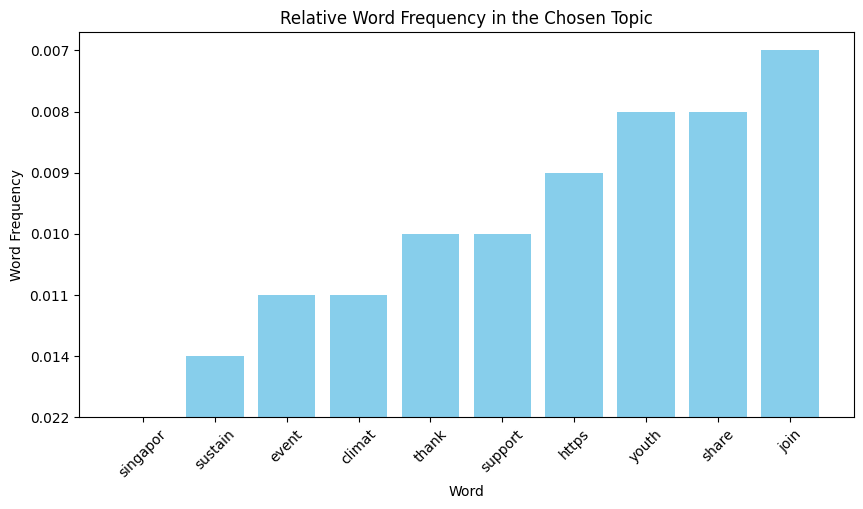

(['singapor', 'sustain', 'event', 'climat', 'thank', 'support', 'https', 'youth', 'share', 'join'], ['0.022', '0.014', '0.011', '0.011', '0.010', '0.010', '0.009', '0.008', '0.008', '0.007'])


In [29]:
import matplotlib.pyplot as plt
def disp_graph(freq_array, word_array):
  plt.figure(figsize=(10, 5))
  plt.bar(freq_array, word_array, color='skyblue')
  plt.xlabel('Word')
  plt.ylabel('Word Frequency')
  plt.title('Relative Word Frequency in the Chosen Topic')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

def disp_heatmap(freq_array, word_array):
    plt.figure(figsize=(10, 5))

    # Create a 2D grid from the provided data
    freq_array = np.array(freq_array, dtype=float)
    word_array = np.array(word_array, dtype=float)

    # Plot the heatmap
    plt.imshow([freq_array], cmap='YlGnBu', aspect='auto', extent=[0, len(word_array), 0, 1])

    # Customize the axes and title
    plt.xlabel('Word')
    plt.ylabel('Word Frequency')
    plt.title('Relative Word Frequency in the Chosen Topic')
    plt.xticks(np.arange(len(word_array)), word_array, rotation=45)

    # Show the color bar
    plt.colorbar()

    plt.show()

def two_arr(topic):
  topic = topic.split(" + ")
  topic = "".join(topic)
  topic= topic.split("*")
  topic = "".join(topic)
  topic = topic.split('"')
  count = 0
  freq_array = []
  word_array = []
  for word in topic:
    if (count%2==0):
      word_array.append(topic[count])
    else:
      freq_array.append(topic[count])
    count += 1

  min_length = 0
  if (len(freq_array) > len(word_array)):
    min_length = len(word_array)
  else:
    min_length = len(freq_array)

  disp_graph(freq_array[:min_length],word_array[:min_length])
  return (freq_array[:min_length], word_array[:min_length])

print(two_arr(topics_string[0]))


<h1> Topic Selection <br>

<p> The bar graph represents which topic out of the 10 topics is most predominant in a particular document.

[(0, 0.025006814), (1, 0.025006434), (2, 0.025006266), (3, 0.025004415), (4, 0.025009166), (5, 0.025009563), (6, 0.025008101), (7, 0.025006138), (8, 0.7749343), (9, 0.02500884)]


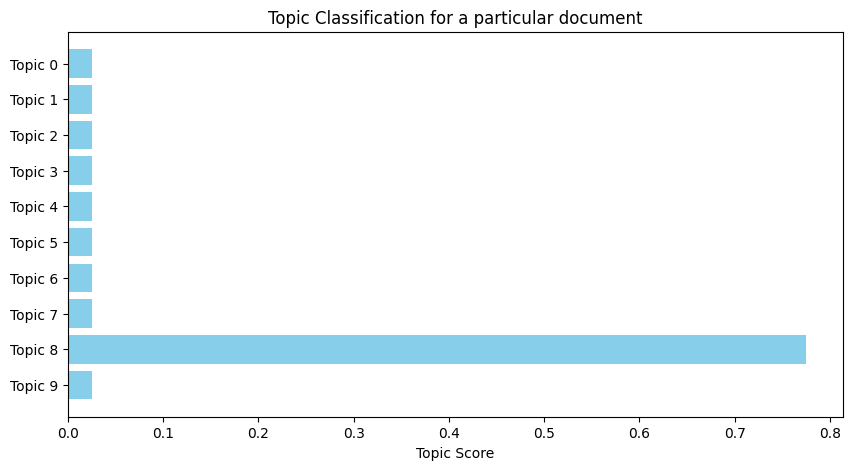

In [30]:
document_bow = dictionary.doc2bow(processed_docs[1])  # Replace with the document of interest
topic_scores = lda_model.get_document_topics(document_bow)
print(list(topic_scores))

import matplotlib.pyplot as plt

# Topic scores for the document (replace with actual scores)
topic_scores_ = []
for query in list(topic_scores):
  topic_scores_.append(query[1])

# Topic labels
topic_labels = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7", "Topic 8", "Topic 9"]

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.barh(topic_labels, topic_scores_, color='skyblue')
plt.xlabel('Topic Score')
plt.title('Topic Classification for a particular document')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
plt.show()


In [ ]:
#